# Loading the libraries and the model

In [ ]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
import cv2
import numpy as np
import csv
import time
from packaging import version
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
import pathlib
import sys
video = cv2.VideoCapture('/content/NVR_ch1_main_20200207123000_20200207130000.asf')
import sys
sys.path.append("/content/")
#sys.path.append("C:/Users/DELL/PycharmProjects/synergy1/models/research/object_detection/utils")

# Object detection imports
import label_map_util
import visualization_utils as vis_util
model_name = 'faster_rcnn_inception_v2_coco_2018_01_28'
model_file = model_name + '.tar.gz'
download_path = 'http://download.tensorflow.org/models/object_detection/'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
path_to_det_graph = model_name + '/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
label_path = os.path.join('C:/Users/DELL/PycharmProjects/synergy1/models/research/object_detection/data/', 'mscoco_label_map.pbtxt')

NUM_CLASSES = 90

def load_model():
  opener = urllib.request.URLopener()
  opener.retrieve(download_path + model_file, model_file)
  tar = tarfile.open(model_file)
  for file in tar.getmembers():
    file_name = os.path.basename(file.name)
    if 'frozen_inference_graph.pb' in file_name:
      tar.extract(file, os.getcwd())


load_model()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: URLopener style of invoking requests is deprecated. Use newer urlopen functions/methods


In [ ]:
model_name = 'faster_rcnn_inception_v2_coco_2018_01_28'
model_file = model_name + '.tar.gz'
# Path to frozen detection graph. This is the actual model that is used for the object detection.
path_to_det_graph = model_name + '/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
label_path = os.path.join('/content/', 'mscoco_label_map.pbtxt')

NUM_CLASSES = 90

# Reading the Test video

In [ ]:
video = cv2.VideoCapture('/content/NVR_ch1_main_20200207123000_20200207130000.asf')


In [ ]:
# initialize .csv
with open('traffic.csv', 'w') as f:
    writer = csv.writer(f)
    csv_line = \
        'Vehicle Type/Size, Direction,Speed (km/h)'
    writer.writerows([csv_line.split(',')])


In [ ]:
cars_passed=0

In [ ]:
det_graph = tf.compat.v1.Graph()
with det_graph.as_default():
    od_def = tf.compat.v1.GraphDef()
    with tf.compat.v2.io.gfile.GFile(path_to_det_graph, 'rb') as fid:
        srl_graph = fid.read()
        od_def.ParseFromString(srl_graph)
        tf.import_graph_def(od_def, name='')


In [ ]:
label_map = label_map_util.load_labelmap(label_path)
categories = label_map_util.convert_label_map_to_categories(label_map,
        max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)


In [ ]:
import imutils
ret,frame_in=video.read()
frame_in=imutils.resize(frame_in,width=500)

fshape = frame_in.shape    
print(frame_in.shape)
fheight = fshape[0]
fwidth = fshape[1]
FILE_OUTPUT='Video.asf'
out = cv2.VideoWriter(FILE_OUTPUT, cv2.VideoWriter_fourcc('M', 'J', 'P', 'G'),
                      24, (fwidth, fheight))

(281, 500, 3)


# Vehicle and congestion detection

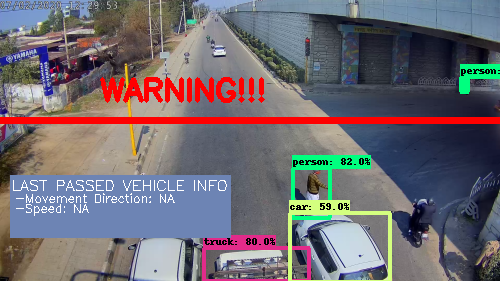

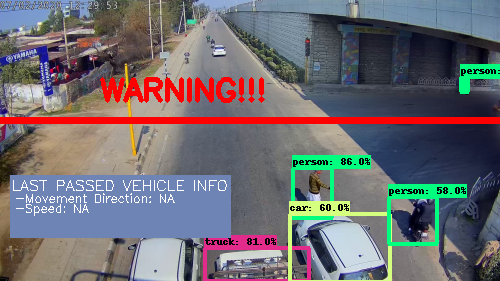

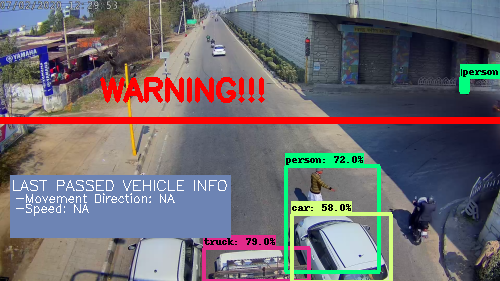

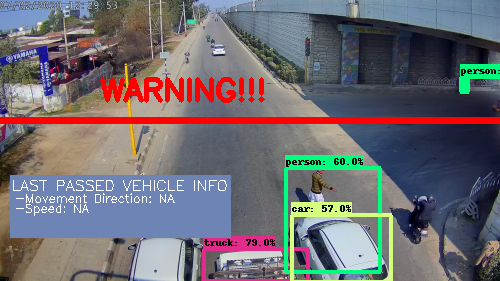

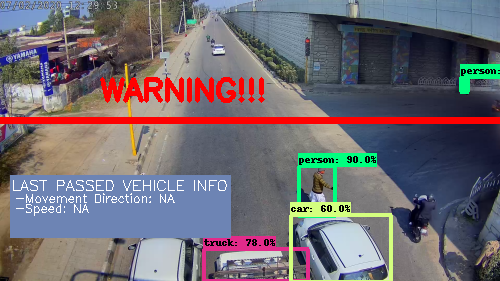

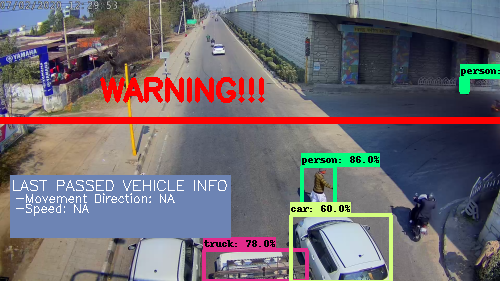

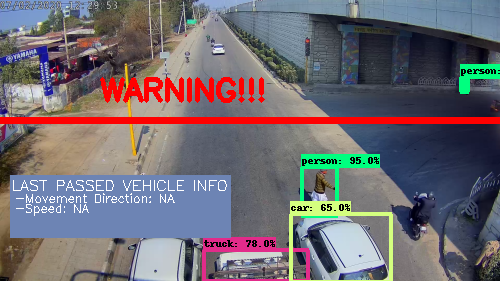

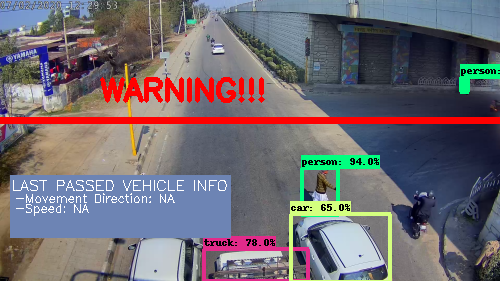

In [ ]:
from google.colab.patches import cv2_imshow
def veh_detection():
    spd='No vehicle'
    cars_passed=0
    drn='No vehicle'
    size ='No vehicle'
    color ='No vehicle'

    
    with det_graph.as_default():
        with tf.compat.v1.Session(graph=det_graph) as sess:

            # Definite input and output Tensors for detection_graph
            img_tensor = det_graph.get_tensor_by_name('image_tensor:0')

            # Each box represents a part of the image where a particular object was detected.
            dtn_boxes =det_graph.get_tensor_by_name('detection_boxes:0')

            # Each score represent how level of confidence for each of the objects.
            # Score is shown on the result image, together with the class label.
            dtn_scores = det_graph.get_tensor_by_name('detection_scores:0')
            dtn_classes = det_graph.get_tensor_by_name('detection_classes:0')
            number_detections =det_graph.get_tensor_by_name('num_detections:0')
                        
            while video.isOpened():
                ret,frame_in=video.read()
                if not ret:
                    print ('Finished')
                    break                              
                frame_in=imutils.resize(frame_in,width=500)
                image = np.expand_dims(frame_in, axis=0)
                (boxes, scores, classes, num) =sess.run([dtn_boxes, dtn_scores,dtn_classes, number_detections],feed_dict={img_tensor: image})
                #try:
                counter, csv_line,spd,drn =vis_util.visualize_boxes_and_labels_on_image_array(video.get(1),
                    frame_in,
                    np.squeeze(boxes),
                    np.squeeze(classes).astype(np.int32),
                    np.squeeze(scores),
                    category_index,
                    use_normalized_coordinates=True,
                    line_thickness=4)
                for i,b in enumerate(boxes[0]):
                    if classes[0][i]==3 or classes[0][i]==6 or classes[0][i]==8:
                        if scores[0][i]>0.5:
                            mid_x=(boxes[0][i][3]+boxes[0][i][1])/2
                            mid_y=(boxes[0][i][2]+boxes[0][i][0])/2
                            distance = round(((1 - (boxes[0][i][3] - boxes[0][i][1]))**4),1)
                            cv2.putText(frame_in, '{}'.format(distance), (int(mid_x*800),int(mid_y*450)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,255), 2)

                            if distance <=0.5:
                                if mid_x > 0.3 and mid_x < 0.7:
                                    cv2.putText(frame_in, 'WARNING!!!', (100,100), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0,0,255), 3)
                    
                #print(bottom)
                cars_passed=cars_passed+counter
                 # insert information text to video frame
                style = cv2.FONT_HERSHEY_SIMPLEX
            
                 # when the vehicle passed over line and counted, make the color of ROI line green
                if counter == 1:
                    cv2.line(frame_in, (0, 120), (1500, 120), (0, 0xFF, 0), 5)
                else:
                    cv2.line(frame_in, (0, 120), (1500, 120), (0, 0, 0xFF), 5)

                # insert information text to video frame
                cv2.rectangle(frame_in, (10, 175), (230, 237), (180, 132, 109), -1)
                cv2.putText(
                    frame_in,
                    'Region Of Interest ',
                    (545, 190),
                    style,
                    0.6,
                    (0, 0, 0xFF),
                    2,
                    cv2.LINE_AA,
                    )
                cv2.putText(
                    frame_in,
                    'LAST PASSED VEHICLE INFO',
                    (11, 190),
                    style,
                    0.5,
                    (0xFF, 0xFF, 0xFF),
                    1,
                    cv2.FONT_HERSHEY_SIMPLEX,
                    )
                cv2.putText(
                    frame_in,
                    '-Movement Direction: ' + drn,
                    (14, 202),
                    style,
                    0.4,
                    (0xFF, 0xFF, 0xFF),
                    1,
                    cv2.FONT_HERSHEY_COMPLEX_SMALL,
                    )
                cv2.putText(
                    frame_in,
                    '-Speed: ' + str(spd),
                    (14, 212),
                    style,
                    0.4,
                    (0xFF, 0xFF, 0xFF),
                    1,
                    cv2.FONT_HERSHEY_COMPLEX_SMALL,
                    )
             
                # Saves for video"""
                #if ret == True:
                out.write(frame_in) 
                cv2_imshow(frame_in)
                
                #cv2.imshow('vehicle detection', input_frame)

                if cv2.waitKey(1) & 0xFF == ord('q'):
                    break

                if csv_line != 'not_available':
                    with open('traffic.csv', 'a') as f:
                        writer = csv.writer(f)
                        (direction, speed) = \
                            csv_line.split(',')
                        writer.writerows([csv_line.split(',')])
            video.release()
            cv2.destroyAllWindows()
            os.remove("C:/Users/DELL/PycharmProjects/experimentsynergy/bottom.txt")
            os.remove("C:/Users/DELL/PycharmProjects/experimentsynergy/frame.txt")


veh_detection()                   